# **Data Visualizations**

In [4]:
import os       # Used to load the data from aclImdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(will delete this later)
So far:
- Got the train, test data
- looked at shape of train, test
- got the BoW and the vocab ratings
- looked at top 10 highest and lowest rated words
- Compared the split of the data to see if evenly distributed
- Review Length comparisons

---
# **Getting the Reviews**

In [65]:
data_path = "../data/raw/imdb/aclImdb"

def load_imdb(split="train"):
    '''
    Takes in "train" or "test" as parameters for which folder in the aclImdb to read.
    Reads all files in the pos and neg folders from the split and labels them
    1 if in the pos folder and 0 if in the neg folder.
    Returns a pandas Dataframe of the data with columns: text, label
    (the pos reviews will be top and neg reviews at the bottom).
    '''
    data = []
    for review in ["pos", "neg"]:
        folder = os.path.join(data_path, split, review)
        for folder_name in os.listdir(folder):
            with open(os.path.join(folder, folder_name), "r", encoding="utf-8") as f:
                text = f.read()
            data.append({"review": text, "label": 1 if review == "pos" else 0})
    return pd.DataFrame(data)

In [66]:
train_df = load_imdb("train")
train_df.head()

,review,label
0,For a movie that gets no respect there sure ar...,1
1,Bizarre horror movie filled with famous faces ...,1
2,"A solid, if unremarkable film. Matthau, as Ein...",1
3,It's a strange feeling to sit alone in a theat...,1
4,"You probably all already know this by now, but...",1


In [67]:
test_df = load_imdb("test")
test_df.head()

,review,label
0,"Based on an actual story, John Boorman shows t...",1
1,This is a gem. As a Film Four production - the...,1
2,"I really like this show. It has drama, romance...",1
3,This is the best 3-D experience Disney has at ...,1
4,"Of the Korean movies I've seen, only three had...",1


In [19]:
print(train_df.shape)
print(test_df.shape)
print(train_df["label"].unique())

(25000, 2)
(25000, 2)
[1 0]


The test and training data are split evenly with 25000 reviews in each set. There are only 2 classes (1 for pos and 0 for neg).

### **Utilizing the BoWs (Bag of Words) from the dataset's README**
`imdbEr.txt` contains the expected rating for each token/word in `imdb.vocab`. The expected rating is a good way to get a sense for the average polarity of a word in the dataset. 

Ratings Metric:
- Less than 0 = the word is commonly used in negative reviews
- ~0 = neutral word
- Greater than 0 = positive

In [39]:
# Dataframe for the vocab word and its associated rating

vocab_path = "../data/raw/imdb/aclImdb/imdb.vocab"
er_path = "../data/raw/imdb/aclImdb/imdbEr.txt"

with open(vocab_path, "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f]

with open(er_path, "r", encoding="utf-8") as f:
    rating = [float(line.strip()) for line in f]

words_df = pd.DataFrame({"index": range(len(vocab)), "word": vocab, "rating":rating})

words_df.head()

,index,word,rating
0,0,the,0.049097
1,1,and,0.201364
2,2,a,0.033395
3,3,of,0.099838
4,4,to,-0.079021


In [42]:
# Top 10 most negative words
words_df.sort_values("rating").head(10)

,index,word,rating
67306,67306,subspace,-4.5
80133,80133,bobbins,-4.5
46645,46645,agis,-4.5
25509,25509,wurb,-4.5
70915,70915,schnass,-4.5
72984,72984,line-dancing,-4.5
67346,67346,onside,-4.5
75671,75671,slo,-4.5
41453,41453,lemmya,-4.5
71148,71148,rectangle,-4.5


In [44]:
# Top 10 most positive words
words_df.sort_values("rating", ascending=False).head(10)

,index,word,rating
60165,60165,televise,4.5
24741,24741,cloudkicker,4.5
43263,43263,crimefighter,4.5
60354,60354,tenderhearted,4.5
24961,24961,swatch,4.5
72260,72260,untutored,4.5
24914,24914,graaff,4.5
60142,60142,watcha,4.5
60137,60137,debriefing,4.5
60125,60125,cadmus,4.5


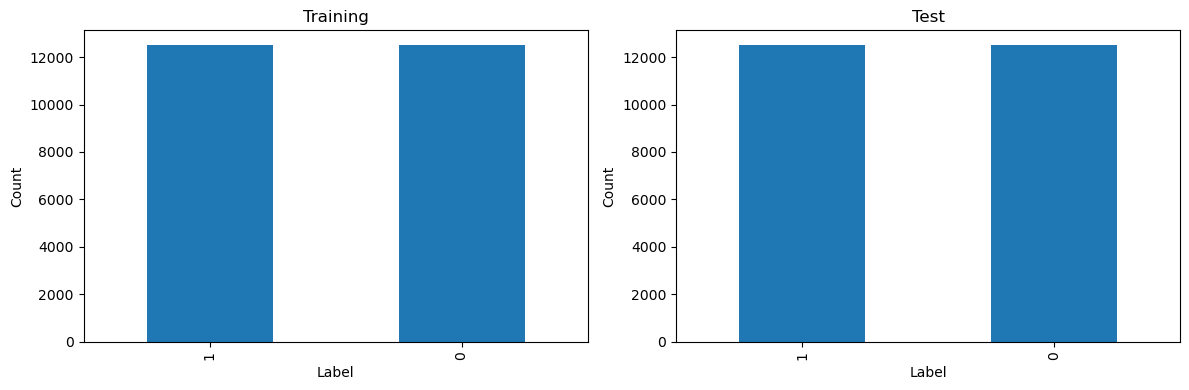

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
train_df['label'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title("Training")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

test_df['label'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("Test")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

Positive Reviews' Word Count:
    Average:  236.70656
    Median:  174.0
    Std:  180.4857429860877
    Min:  12
    Max:  2470
Negative Reviews' Word Count:
    Average:  230.86784
    Median:  174.0
    Std:  166.66312616036015
    Min:  10
    Max:  1522


Text(0.5, 0, 'Word Count')

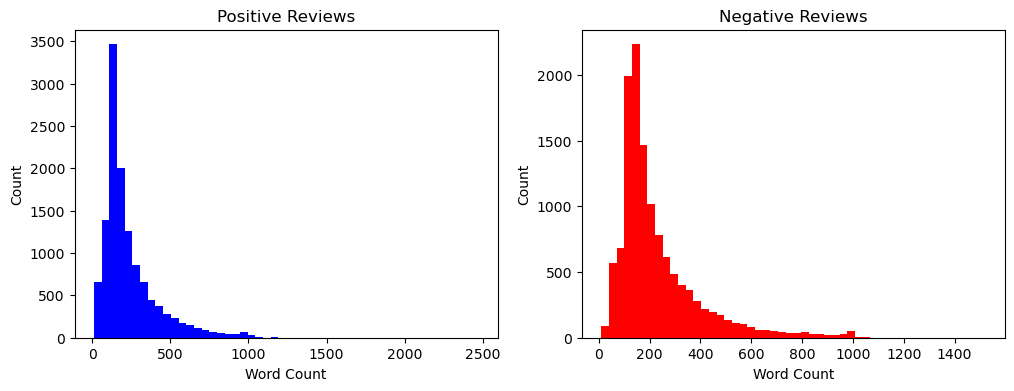

In [84]:
# Compare lengths of pos reviews vs neg reviews
train_df['length'] = train_df['review'].apply(lambda x: len(x.split()))

print("Positive Reviews' Word Count:")
print("    Average: ", train_df[train_df["label"]==1]['length'].mean())
print("    Median: ", train_df[train_df["label"]==1]['length'].median())
print("    Std: ", train_df[train_df["label"]==1]['length'].std())
print("    Min: ", train_df[train_df["label"]==1]['length'].min())
print("    Max: ", train_df[train_df["label"]==1]['length'].max())

print("Negative Reviews' Word Count:")
print("    Average: ", train_df[train_df["label"]==0]['length'].mean())
print("    Median: ", train_df[train_df["label"]==0]['length'].median())
print("    Std: ", train_df[train_df["label"]==0]['length'].std())
print("    Min: ", train_df[train_df["label"]==0]['length'].min())
print("    Max: ", train_df[train_df["label"]==0]['length'].max())

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(pos, bins=50, color='blue')
ax[0].set_title("Positive Reviews")
ax[0].set_ylabel("Count")
ax[0].set_xlabel("Word Count")

ax[1].hist(neg, bins=50, color='red')
ax[1].set_title("Negative Reviews")
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Word Count")